In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/kaggle/input/nyc-taxi-trip-duration/NYC.csv")
df.head(8)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551


In [3]:
df.shape

(1458644, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
null_per = df.isnull().sum()/df.shape[0]*100
null_per

id                    0.0
vendor_id             0.0
pickup_datetime       0.0
dropoff_datetime      0.0
passenger_count       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
store_and_fwd_flag    0.0
trip_duration         0.0
dtype: float64

<Axes: >

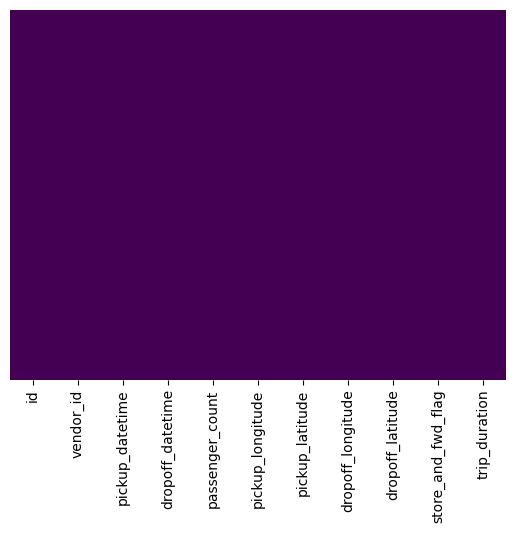

In [6]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [7]:
# Convert datetime columns to datetime objects with error handling
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [8]:
df.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,2016-04-01 10:10:24.940037376,2016-04-01 10:26:24.432310528,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
min,1.000000e+00,2016-01-01 00:00:17,2016-01-01 00:03:31,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,2016-02-17 16:46:04.249999872,2016-02-17 17:05:32.500000,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,2016-04-01 17:19:40,2016-04-01 17:35:12,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2016-05-15 03:56:08.750000128,2016-05-15 04:10:51.750000128,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,2016-06-30 23:59:39,2016-07-01 23:02:03,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06
std,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03


## Observations:

Passenger count = 0 or > 6.

Trip duration extremely large Max = 3,526,282 sec (~40 days!) and std is much larger than median.

Coordinates way outside NYC. NYC normal longitude is around –74.0 and latitude is around 40.7.

**Possible invalid timestamps:** e.g dropoff_datetime < pickup_datetime

Pickup min = 2016-01-01 00:00:17

Pickup max = 2016-06-30 23:59:39

Dropoff max = 2016-07-01 23:02:03

In [9]:
sum(df.duplicated())

0

In [10]:
df.store_and_fwd_flag.value_counts()

store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64

vendor_id
2    780302
1    678342
Name: count, dtype: int64


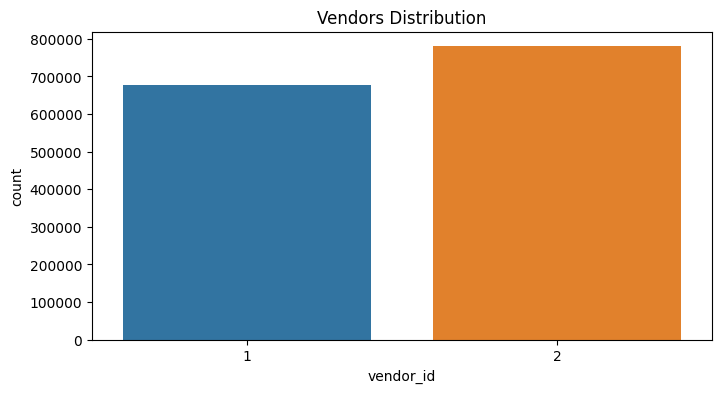

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x="vendor_id", data=df)
plt.title("Vendors Distribution")
print(df.vendor_id.value_counts())

passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64


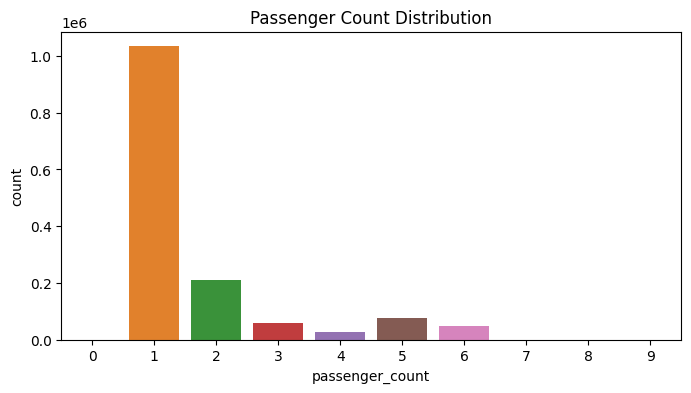

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(x="passenger_count", data=df)
plt.title("Passenger Count Distribution")
print(df.passenger_count.value_counts())

In [13]:
df.drop(df[df["passenger_count"].isin([0, 7, 8, 9])].index, inplace=True)

In [14]:
df.passenger_count.unique()

array([1, 6, 4, 2, 3, 5])

Text(0.5, 1.0, 'Trip Duration Boxplot')

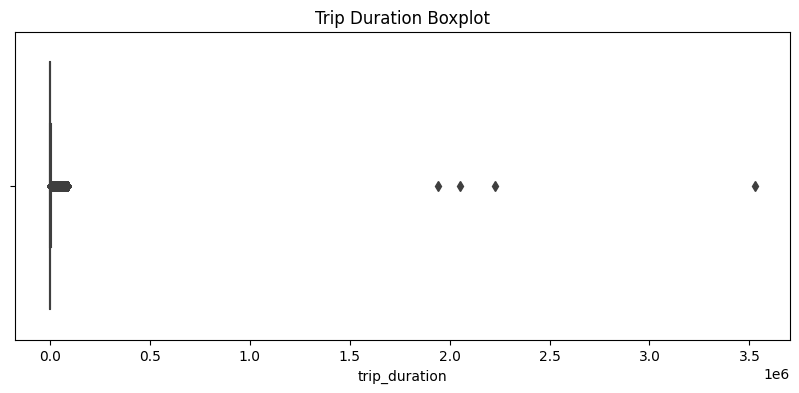

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['trip_duration'])
plt.title("Trip Duration Boxplot")

In [16]:
q1 = df['trip_duration'].quantile(0.25)
q3 = df['trip_duration'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['trip_duration'] < lower_bound) | (df['trip_duration'] > upper_bound)]
outlier_percentage = len(outliers) / len(df) * 100

print(f"Trip Duration Outliers: {len(outliers)} ({outlier_percentage:.2f}% of dataset)")
print("Sample Outliers:")
print(outliers[['trip_duration']].sample(5))

Trip Duration Outliers: 74216 (5.09% of dataset)
Sample Outliers:
         trip_duration
1257995           2709
1310574           2178
1237303           2468
1402040           4014
1404149           2587


Text(0, 0.5, 'Latitude')

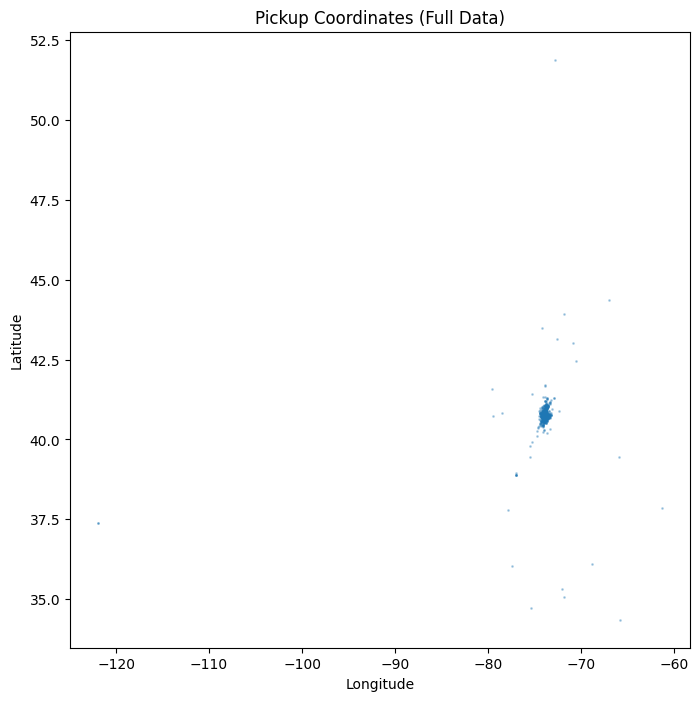

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], s=1, alpha=0.3)
plt.title("Pickup Coordinates (Full Data)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

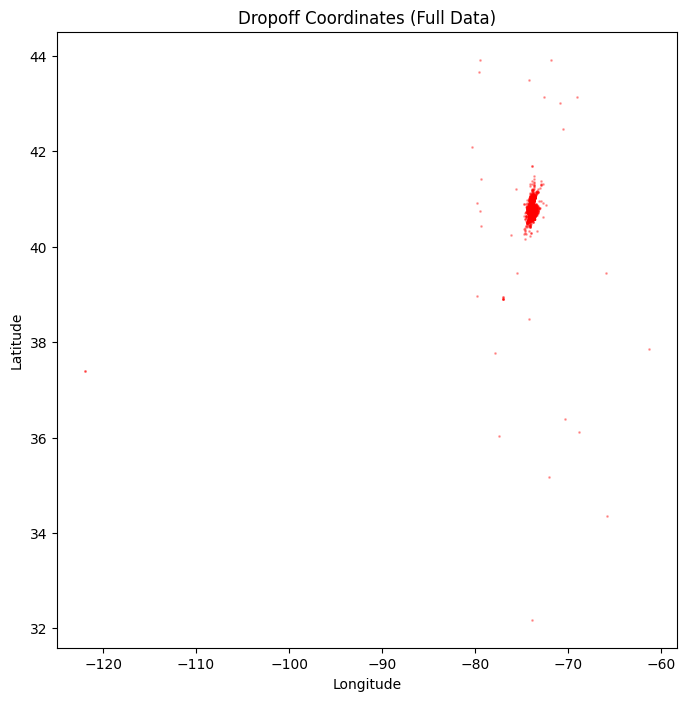

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], s=1, alpha=0.3, c='red')
plt.title("Dropoff Coordinates (Full Data)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [19]:
lon_min, lon_max = -74.05, -73.75
lat_min, lat_max = 40.63, 40.85

coord_outliers = df[
    (df['pickup_longitude'] < lon_min) | (df['pickup_longitude'] > lon_max) |
    (df['pickup_latitude'] < lat_min) | (df['pickup_latitude'] > lat_max) |
    (df['dropoff_longitude'] < lon_min) | (df['dropoff_longitude'] > lon_max) |
    (df['dropoff_latitude'] < lat_min) | (df['dropoff_latitude'] > lat_max)
]

coord_outlier_percentage = len(coord_outliers) / len(df) * 100
print(f"\nCoordinate Outliers: {len(coord_outliers)} ({coord_outlier_percentage:.2f}% of dataset)")
print("Sample Coordinate Outliers:")
print(coord_outliers[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].sample(5))


Coordinate Outliers: 18676 (1.28% of dataset)
Sample Coordinate Outliers:
         pickup_longitude  pickup_latitude  dropoff_longitude  \
393361         -73.979767        40.763779         -73.905510   
1293232        -73.972557        40.761986         -74.112846   
1370509        -73.945015        40.808510         -73.923691   
470706         -73.953423        40.791100         -74.187088   
599161         -73.983536        40.762432         -74.177238   

         dropoff_latitude  
393361          40.889462  
1293232         40.680214  
1370509         40.864239  
470706          40.677280  
599161          40.695190  


Text(0.5, 0, 'Is Dropoff < Pickup?')

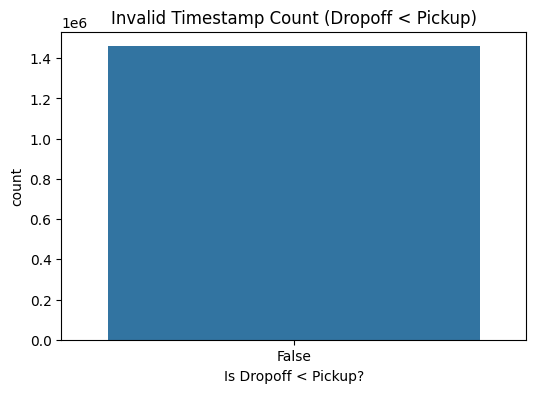

In [20]:
invalid_times = (df['dropoff_datetime'] < df['pickup_datetime'])

plt.figure(figsize=(6,4))
sns.countplot(x=invalid_times)
plt.title("Invalid Timestamp Count (Dropoff < Pickup)")
plt.xlabel("Is Dropoff < Pickup?")

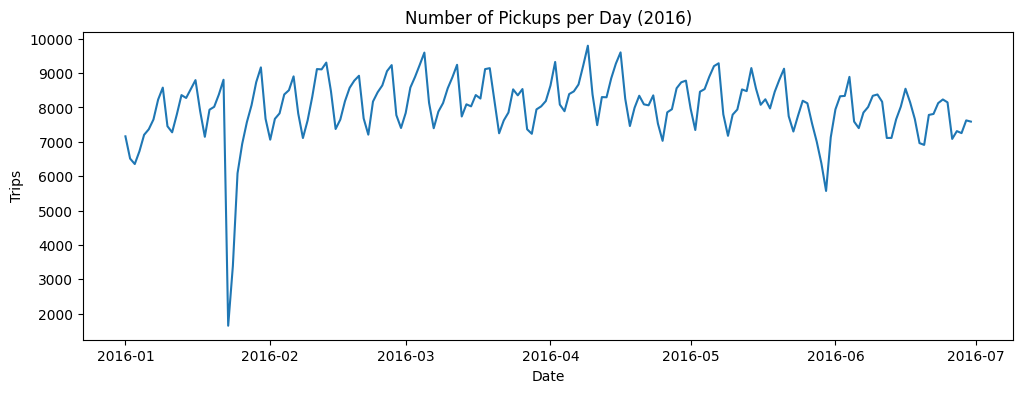

In [21]:
plt.figure(figsize=(12,4))
df['pickup_datetime'].dt.date.value_counts().sort_index().plot()
plt.title("Number of Pickups per Day (2016)")
plt.ylabel("Trips")
plt.xlabel("Date")
plt.show()

In [22]:
daily_counts = df.groupby(df['pickup_datetime'].dt.date).size()
low_spike_day = daily_counts.idxmin()
low_spike_count = daily_counts.min()

print(f"Lowest Pickup Day: {low_spike_day} with {low_spike_count} pickups")

Lowest Pickup Day: 2016-01-23 with 1648 pickups


## Data Cleaning & Observations Summary

1. **Trip Duration**
   - Outliers detected using IQR.
   - Very high trip durations are unrealistic and likely data errors.
   - Action: Remove extreme outliers beyond reasonable thresholds.

2. **Coordinates (Latitude & Longitude)**
   - Outliers indicate trips outside NYC bounds.
   - These are likely data entry errors or noise.
   - Action: Filter coordinates to valid NYC bounding box ranges.

3. **Pickups per Day (2016)**
   - Identified unusually low activity on `2016-01-23` (only 1648 pickups).
   - This coincides with the **2016 blizzard** that shut down NYC transport.
   - Action: Retain this data (not an error, real-world event). Consider adding a weather/event feature for better modeling.

---

### Final Decision
- **Remove invalid values** (extreme trip durations and out-of-bound coordinates).  
- **Keep rare but real-world events** (e.g., Jan 23, 2016 blizzard).  
- This ensures robust cleaning while avoiding data leakage.


In [23]:
# 1. Trip Duration Filtering
df = df[(df['trip_duration'] >= 60) & (df['trip_duration'] <= 10800)]

# 2. Coordinate Filtering
df = df[(df['pickup_latitude'].between(40.5, 41.0)) &
        (df['pickup_longitude'].between(-74.3, -73.6)) &
        (df['dropoff_latitude'].between(40.5, 41.0)) &
        (df['dropoff_longitude'].between(-74.3, -73.6))]

# 3. Pickup Date Outlier Day
pickup_counts = df.groupby(df['pickup_datetime'].dt.date).size()
lowest_day = pickup_counts.idxmin()
lowest_count = pickup_counts.min()

print(f"Lowest pickup day: {lowest_day} with {lowest_count} pickups")

# Keep this day (blizzard effect), but mark it
df['blizzard_day'] = (df['pickup_datetime'].dt.date == lowest_day).astype(int)

print("Data cleaned successfully. Shape:", df.shape)


Lowest pickup day: 2016-01-23 with 1627 pickups
Data cleaned successfully. Shape: (1447397, 12)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1447397 entries, 0 to 1458643
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1447397 non-null  object        
 1   vendor_id           1447397 non-null  int64         
 2   pickup_datetime     1447397 non-null  datetime64[ns]
 3   dropoff_datetime    1447397 non-null  datetime64[ns]
 4   passenger_count     1447397 non-null  int64         
 5   pickup_longitude    1447397 non-null  float64       
 6   pickup_latitude     1447397 non-null  float64       
 7   dropoff_longitude   1447397 non-null  float64       
 8   dropoff_latitude    1447397 non-null  float64       
 9   store_and_fwd_flag  1447397 non-null  object        
 10  trip_duration       1447397 non-null  int64         
 11  blizzard_day        1447397 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(4), object(2)
memory usage: 143.6+ 

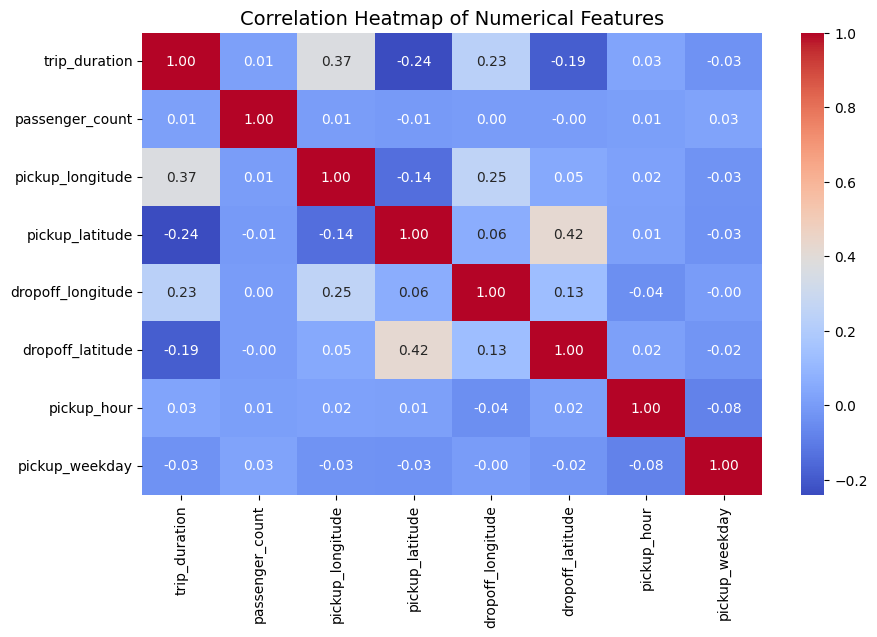

In [25]:
# Feature Engineering for Analysis
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday  # 0=Mon, 6=Sun

# Correlation Heatmap
num_cols = ['trip_duration', 'passenger_count',
            'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude',
            'pickup_hour', 'pickup_weekday']

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

In [26]:
# Extract features from dropoff_datetime
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_month'] = df['dropoff_datetime'].dt.month
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday  # 0=Mon, 6=Sun

# Drop the original datetime columns
df.drop(columns=['pickup_datetime', 'dropoff_datetime'], inplace=True)

df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,blizzard_day,pickup_hour,pickup_day,pickup_month,pickup_weekday,dropoff_hour,dropoff_day,dropoff_month,dropoff_weekday
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,17,14,3,0,17,14,3,0
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,0,12,6,6,0,12,6,6
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0,11,19,1,1,12,19,1,1
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0,19,6,4,2,19,6,4,2
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0,13,26,3,5,13,26,3,5


### Encoding Categorical Variables and Feature Scaling

Why RobustScaler?

Deals with outliers and this kind of large datasets

In [27]:
from sklearn.preprocessing import RobustScaler

df = df.drop(columns=['id'])

df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

numeric_cols = df.select_dtypes(include=[np.number]).columns
robust_scaler = RobustScaler()
df[numeric_cols] = robust_scaler.fit_transform(df[numeric_cols])

print("Final dataset shape:", df.shape)
df.head()

Final dataset shape: (1447397, 17)


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,blizzard_day,pickup_hour,pickup_day,pickup_month,pickup_weekday,dropoff_hour,dropoff_day,dropoff_month,dropoff_weekday
0,0.0,0.0,-0.015923,0.445896,0.536922,0.326275,0.0,-0.311111,0.0,0.3,-0.066667,-0.333333,-0.75,0.3,-0.066667,-0.333333,-0.75
1,-1.0,0.0,0.055261,-0.503081,-0.698675,-0.690844,0.0,-0.002963,0.0,-1.4,-0.200000,0.666667,0.75,-1.4,-0.200000,0.666667,0.75
2,0.0,0.0,0.112082,0.316737,-0.906140,-1.312760,0.0,2.161481,0.0,-0.3,0.266667,-1.000000,-0.50,-0.2,0.266667,-1.000000,-0.50
3,0.0,0.0,-1.157040,-1.103771,-1.152015,-1.412209,0.0,-0.349630,0.0,0.5,-0.600000,0.000000,-0.25,0.5,-0.600000,0.000000,-0.25
4,0.0,0.0,0.356541,1.262386,0.242900,0.825769,0.0,-0.340741,0.0,-0.1,0.733333,-0.333333,0.50,-0.1,0.733333,-0.333333,0.50


## Modelling

Training models: 100%|██████████| 4/4 [15:29<00:00, 232.29s/it]


                           Model  Train RMSE  Test RMSE  Train R²   Test R²
0              Linear Regression    0.808629   0.810981  0.307040  0.306069
1  Polynomial Regression (deg=2)    0.628210   0.642149  0.581766  0.564922
2                  Random Forest    0.159185   0.425859  0.973146  0.808651
3                        XGBoost    0.445436   0.452447  0.789728  0.784012


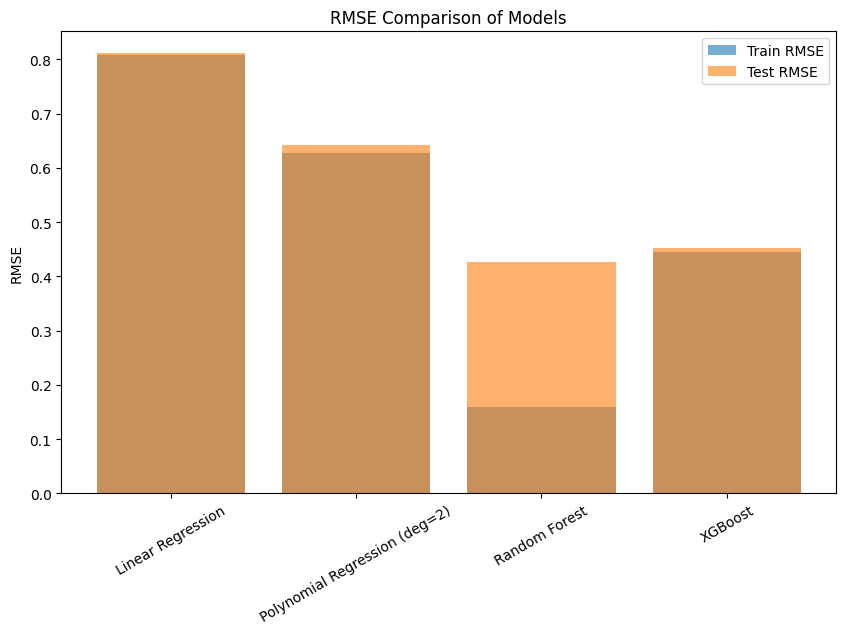

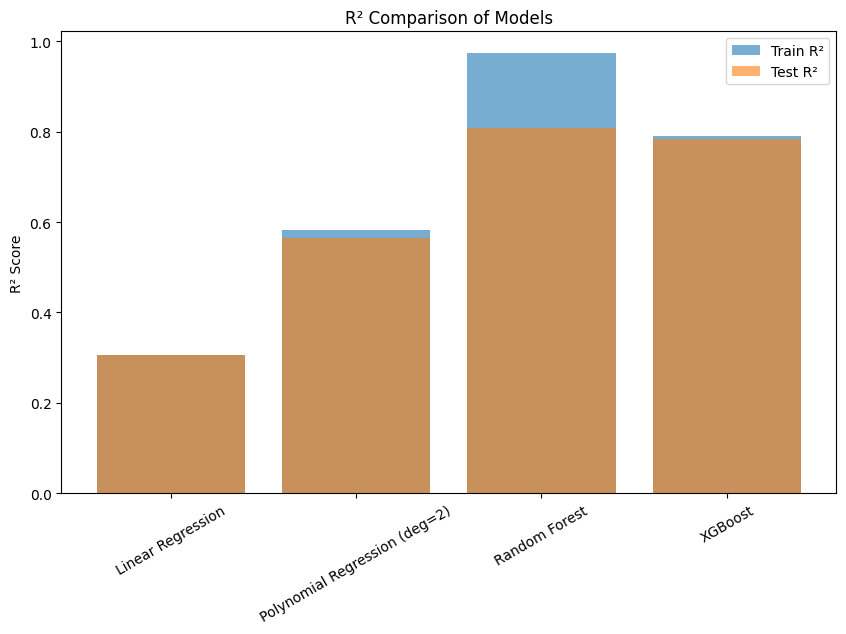

In [30]:
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Train-test split
X = df.drop(columns=['trip_duration'])
y = df['trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (deg=2)': Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('linear', LinearRegression())
    ]),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1)
}

results = []

# Evaluate models with progress bar
for name, model in tqdm(models.items(), desc="Training models"):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append([name, train_rmse, test_rmse, train_r2, test_r2])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Train RMSE", "Test RMSE", "Train R²", "Test R²"])
print(results_df)

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Train RMSE'], alpha=0.6, label='Train RMSE')
plt.bar(results_df['Model'], results_df['Test RMSE'], alpha=0.6, label='Test RMSE')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Models')
plt.xticks(rotation=30)
plt.legend()
plt.show()

# Plot R² comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Train R²'], alpha=0.6, label='Train R²')
plt.bar(results_df['Model'], results_df['Test R²'], alpha=0.6, label='Test R²')
plt.ylabel('R² Score')
plt.title('R² Comparison of Models')
plt.xticks(rotation=30)
plt.legend()
plt.show()

Linear Regression : Weak performance, very underfit.

Polynomial Regression (deg=2) : Better than linear, captures some non-linearity. Still not the best.

Random Forest : Huge improvement, but some overfitting (big train–test gap).

XGBoost : More balanced than RF, slightly lower performance but less overfit.

#### I’d recommend RF and XGBoost and tuning them

## Optimization and Comparison Visualization

Baseline XGBoost
Train RMSE: 0.4186, Test RMSE: 0.4272
Train R²: 0.8143, Test R²: 0.8075
Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Optimized XGBoost
Train RMSE: 0.3886, Test RMSE: 0.4069
Train R²: 0.8400, Test R²: 0.8253


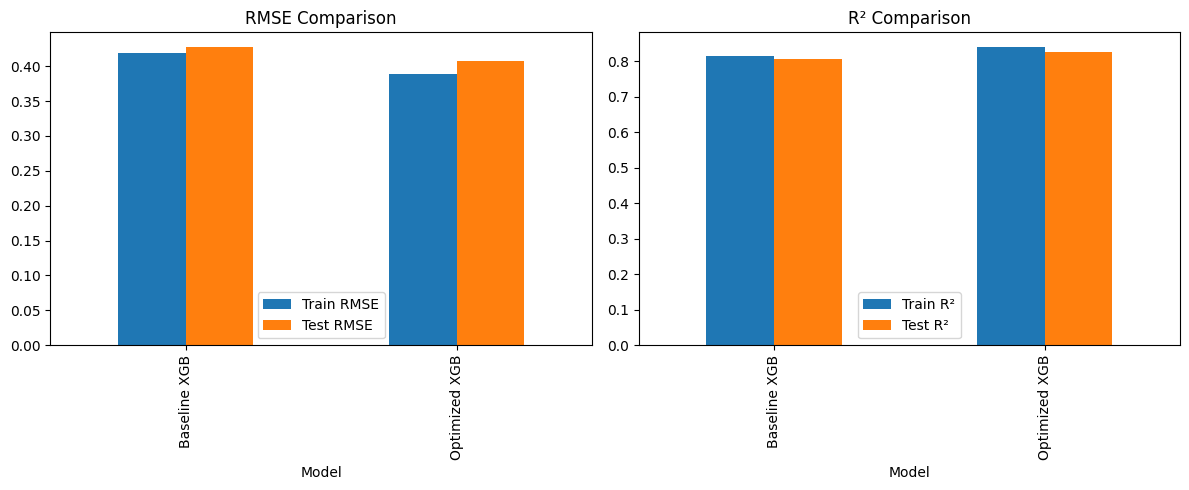

In [32]:
from sklearn.model_selection import GridSearchCV

# Baseline XGBoost
xgb = XGBRegressor(random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

baseline_rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
baseline_rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
baseline_r2_train = r2_score(y_train, y_pred_train)
baseline_r2_test = r2_score(y_test, y_pred_test)

print("Baseline XGBoost")
print(f"Train RMSE: {baseline_rmse_train:.4f}, Test RMSE: {baseline_rmse_test:.4f}")
print(f"Train R²: {baseline_r2_train:.4f}, Test R²: {baseline_r2_test:.4f}")

# GridSearchCV for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Evaluate optimized XGBoost
best_xgb = grid_search.best_estimator_
y_pred_train_opt = best_xgb.predict(X_train)
y_pred_test_opt = best_xgb.predict(X_test)

opt_rmse_train = mean_squared_error(y_train, y_pred_train_opt, squared=False)
opt_rmse_test = mean_squared_error(y_test, y_pred_test_opt, squared=False)
opt_r2_train = r2_score(y_train, y_pred_train_opt)
opt_r2_test = r2_score(y_test, y_pred_test_opt)

print("Optimized XGBoost")
print(f"Train RMSE: {opt_rmse_train:.4f}, Test RMSE: {opt_rmse_test:.4f}")
print(f"Train R²: {opt_r2_train:.4f}, Test R²: {opt_r2_test:.4f}")

# Performance comparison plot
results = pd.DataFrame({
    "Model": ["Baseline XGB", "Optimized XGB"],
    "Train RMSE": [baseline_rmse_train, opt_rmse_train],
    "Test RMSE": [baseline_rmse_test, opt_rmse_test],
    "Train R²": [baseline_r2_train, opt_r2_train],
    "Test R²": [baseline_r2_test, opt_r2_test],
})

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

results.plot(x="Model", y=["Train RMSE", "Test RMSE"], kind="bar", ax=axes[0], title="RMSE Comparison")
results.plot(x="Model", y=["Train R²", "Test R²"], kind="bar", ax=axes[1], title="R² Comparison")

plt.tight_layout()
plt.show()